In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRFRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct
from scipy.stats import pearsonr, spearmanr

# 5A GPR Model

In [4]:
# Import data and convert absorbance to solubility
master_results = pd.read_csv("master_results.csv")

master_results["mean_curcumin_conc"] = ((master_results["Mean Absorbance"]-0.0051)/68.628)*1000 

In [5]:
# Log transform the data
master_results['curc_conc_logged']=np.log10(master_results['mean_curcumin_conc'])

In [6]:
X = master_results[['T20','T80','P188','DMSO','PG']]
y = master_results['curc_conc_logged']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# define GPR model
estimator_gpr = GaussianProcessRegressor(random_state=42)

In [8]:
parameters = {
    "kernel": [
        1.0 * RBF(length_scale=1.0),                       # Radial Basis Function (RBF) Kernel
        1.0 * Matern(length_scale=1.0, nu=1.5),            # Matern Kernel
        1.0 * RationalQuadratic(length_scale=1.0, alpha=1.0),  # Rational Quadratic Kernel
        1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0), # ExpSineSquared Kernel
        1.0 * DotProduct(sigma_0=1.0)                      # Dot Product Kernel
    ],
    "alpha": [1e-10, 1e-5, 0.1, 1, 10],                    # Noise level (regularization)
    "normalize_y": [True, False]                           # Whether to normalize the target values
}

grid_search_gpr = GridSearchCV(estimator_gpr, param_grid=parameters, cv=3, scoring='r2', verbose=3)

grid_search_gpr.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END alpha=1e-10, kernel=1**2 * RBF(length_scale=1), normalize_y=True;, score=-0.122 total time=   0.0s
[CV 2/3] END alpha=1e-10, kernel=1**2 * RBF(length_scale=1), normalize_y=True;, score=-0.009 total time=   0.0s
[CV 3/3] END alpha=1e-10, kernel=1**2 * RBF(length_scale=1), normalize_y=True;, score=-0.027 total time=   0.0s
[CV 1/3] END alpha=1e-10, kernel=1**2 * RBF(length_scale=1), normalize_y=False;, score=-0.528 total time=   0.0s
[CV 2/3] END alpha=1e-10, kernel=1**2 * RBF(length_scale=1), normalize_y=False;, score=-0.944 total time=   0.0s
[CV 3/3] END alpha=1e-10, kernel=1**2 * RBF(length_scale=1), normalize_y=False;, score=-0.360 total time=   0.0s
[CV 1/3] END alpha=1e-10, kernel=1**2 * Matern(length_scale=1, nu=1.5), normalize_y=True;, score=0.133 total time=   0.0s
[CV 2/3] END alpha=1e-10, kernel=1**2 * Matern(length_scale=1, nu=1.5), normalize_y=True;, score=0.145 total time=   0.0s
[CV 3/3] END alpha=

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: Co

[CV 1/3] END alpha=1, kernel=1**2 * Matern(length_scale=1, nu=1.5), normalize_y=False;, score=-0.044 total time=   0.0s
[CV 2/3] END alpha=1, kernel=1**2 * Matern(length_scale=1, nu=1.5), normalize_y=False;, score=-0.015 total time=   0.0s
[CV 3/3] END alpha=1, kernel=1**2 * Matern(length_scale=1, nu=1.5), normalize_y=False;, score=-0.046 total time=   0.0s
[CV 1/3] END alpha=1, kernel=1**2 * RationalQuadratic(alpha=1, length_scale=1), normalize_y=True;, score=-0.066 total time=   0.0s
[CV 2/3] END alpha=1, kernel=1**2 * RationalQuadratic(alpha=1, length_scale=1), normalize_y=True;, score=-0.005 total time=   0.0s
[CV 3/3] END alpha=1, kernel=1**2 * RationalQuadratic(alpha=1, length_scale=1), normalize_y=True;, score=-0.028 total time=   0.0s
[CV 1/3] END alpha=1, kernel=1**2 * RationalQuadratic(alpha=1, length_scale=1), normalize_y=False;, score=-0.044 total time=   0.0s
[CV 2/3] END alpha=1, kernel=1**2 * RationalQuadratic(alpha=1, length_scale=1), normalize_y=False;, score=-0.015 to

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420:

[CV 2/3] END alpha=1, kernel=1**2 * DotProduct(sigma_0=1), normalize_y=True;, score=0.335 total time=   0.0s
[CV 3/3] END alpha=1, kernel=1**2 * DotProduct(sigma_0=1), normalize_y=True;, score=0.237 total time=   0.0s
[CV 1/3] END alpha=1, kernel=1**2 * DotProduct(sigma_0=1), normalize_y=False;, score=-0.039 total time=   0.0s
[CV 2/3] END alpha=1, kernel=1**2 * DotProduct(sigma_0=1), normalize_y=False;, score=-0.012 total time=   0.0s
[CV 3/3] END alpha=1, kernel=1**2 * DotProduct(sigma_0=1), normalize_y=False;, score=-0.013 total time=   0.0s
[CV 1/3] END alpha=10, kernel=1**2 * RBF(length_scale=1), normalize_y=True;, score=-0.066 total time=   0.0s
[CV 2/3] END alpha=10, kernel=1**2 * RBF(length_scale=1), normalize_y=True;, score=-0.005 total time=   0.0s
[CV 3/3] END alpha=10, kernel=1**2 * RBF(length_scale=1), normalize_y=True;, score=-0.028 total time=   0.0s
[CV 1/3] END alpha=10, kernel=1**2 * RBF(length_scale=1), normalize_y=False;, score=-0.052 total time=   0.0s
[CV 2/3] END

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: Co

[CV 1/3] END alpha=10, kernel=1**2 * Matern(length_scale=1, nu=1.5), normalize_y=True;, score=-0.066 total time=   0.0s
[CV 2/3] END alpha=10, kernel=1**2 * Matern(length_scale=1, nu=1.5), normalize_y=True;, score=-0.005 total time=   0.0s
[CV 3/3] END alpha=10, kernel=1**2 * Matern(length_scale=1, nu=1.5), normalize_y=True;, score=-0.028 total time=   0.0s
[CV 1/3] END alpha=10, kernel=1**2 * Matern(length_scale=1, nu=1.5), normalize_y=False;, score=-0.052 total time=   0.0s
[CV 2/3] END alpha=10, kernel=1**2 * Matern(length_scale=1, nu=1.5), normalize_y=False;, score=-0.334 total time=   0.0s
[CV 3/3] END alpha=10, kernel=1**2 * Matern(length_scale=1, nu=1.5), normalize_y=False;, score=-0.391 total time=   0.0s
[CV 1/3] END alpha=10, kernel=1**2 * RationalQuadratic(alpha=1, length_scale=1), normalize_y=True;, score=-0.066 total time=   0.0s
[CV 2/3] END alpha=10, kernel=1**2 * RationalQuadratic(alpha=1, length_scale=1), normalize_y=True;, score=-0.005 total time=   0.0s
[CV 3/3] END 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: C

[CV 2/3] END alpha=10, kernel=1**2 * RationalQuadratic(alpha=1, length_scale=1), normalize_y=False;, score=-0.334 total time=   0.0s
[CV 3/3] END alpha=10, kernel=1**2 * RationalQuadratic(alpha=1, length_scale=1), normalize_y=False;, score=-0.391 total time=   0.0s
[CV 1/3] END alpha=10, kernel=1**2 * ExpSineSquared(length_scale=1, periodicity=3), normalize_y=True;, score=-0.650 total time=   0.0s
[CV 2/3] END alpha=10, kernel=1**2 * ExpSineSquared(length_scale=1, periodicity=3), normalize_y=True;, score=-0.401 total time=   0.0s
[CV 3/3] END alpha=10, kernel=1**2 * ExpSineSquared(length_scale=1, periodicity=3), normalize_y=True;, score=-0.083 total time=   0.0s
[CV 1/3] END alpha=10, kernel=1**2 * ExpSineSquared(length_scale=1, periodicity=3), normalize_y=False;, score=-0.339 total time=   0.0s
[CV 2/3] END alpha=10, kernel=1**2 * ExpSineSquared(length_scale=1, periodicity=3), normalize_y=False;, score=-0.858 total time=   0.0s
[CV 3/3] END alpha=10, kernel=1**2 * ExpSineSquared(lengt

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: Co

GridSearchCV(cv=3, estimator=GaussianProcessRegressor(random_state=42),
             param_grid={'alpha': [1e-10, 1e-05, 0.1, 1, 10],
                         'kernel': [1**2 * RBF(length_scale=1),
                                    1**2 * Matern(length_scale=1, nu=1.5),
                                    1**2 * RationalQuadratic(alpha=1, length_scale=1),
                                    1**2 * ExpSineSquared(length_scale=1, periodicity=3),
                                    1**2 * DotProduct(sigma_0=1)],
                         'normalize_y': [True, False]},
             scoring='r2', verbose=3)

In [9]:
best_gpr = grid_search_gpr.best_estimator_

In [10]:
y_train_pred, y_train_std = best_gpr.predict(X_train, return_std=True)
y_pred, y_std = best_gpr.predict(X_test, return_std=True)

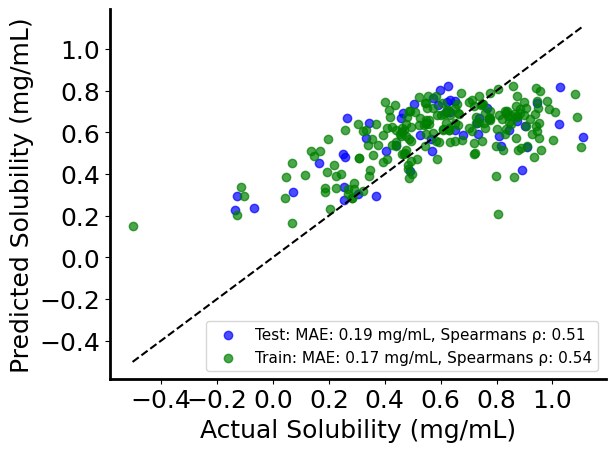

In [11]:
test_mae = mean_absolute_error(y_test, y_pred)
test_spearman, _ = spearmanr(y_test, y_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_spearman, _ = spearmanr(y_train, y_train_pred)

plt.scatter(y_test, y_pred, color='blue', 
            label=(f'Test: MAE: {test_mae:.2f} mg/mL, Spearmans ρ: {test_spearman:.2f}'), 
            alpha=0.7)
plt.scatter(y_train, y_train_pred, color='green', 
            label=(f'Train: MAE: {train_mae:.2f} mg/mL, Spearmans ρ: {train_spearman:.2f}'), 
            alpha=0.7)

plt.xlabel("Actual Solubility (mg/mL)", size=18)
plt.ylabel("Predicted Solubility (mg/mL)", size=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(loc='lower right',fontsize=11)

plt.plot([min(y_test.min(), y_train.min()), max(y_test.max(), y_train.max())],
         [min(y_test.min(), y_train.min()), max(y_test.max(), y_train.max())],
         'k--', label='y = x')

ax = plt.gca()
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# 5B SHAP

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/51 [00:00<?, ?it/s]

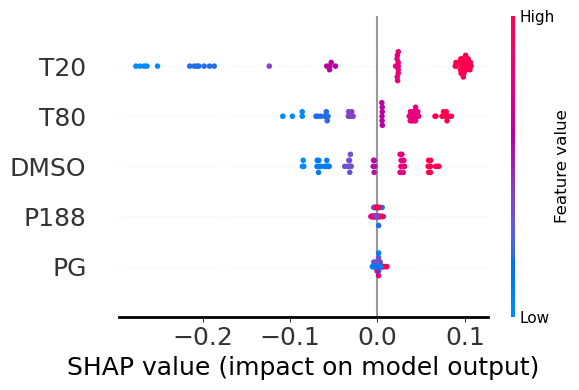

In [12]:
import shap

explainer = shap.KernelExplainer(best_gpr.predict, X_train)
shap_values = explainer.shap_values(X_test)

fig = shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_size=[6,4], show=False)

plt.xlabel(plt.gca().get_xlabel(), fontsize=18)  
plt.ylabel(plt.gca().get_ylabel(), fontsize=18)  

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax = plt.gca()
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()